In [10]:
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
def tokenize(sentence):
    '''
    List all the word tokens (consecutive letters) in a text. Normalize to lowercase.
    '''
    return re.findall('[a-z]+', sentence.lower())

In [12]:
with open('continuous.corpus.en', encoding="utf8", errors='ignore') as f:
    # Initialize an empty list to represent the corpus as a sequence of tokens.
    tokenized_text = []
    for sentence in f:
        sentence = sentence.rstrip('\n')
        tokenized_text.extend(tokenize(sentence))

In [13]:
def frequency(corpus):
    '''
    Generates a dictionary with word types and their counts.

    :param corpus: list of tokens, corpus represented as a sequence of tokens.
    :return freq: dict, word types and their frequencies
    '''
    freq = Counter(corpus)
    return freq

In [14]:
# Generate a dictionary with word types and their counts
unigram_counts = frequency(tokenized_text)

In [15]:
def unigram_prob(word_type, corpus):
    '''
    Calculates the probability of a certain unigram.
    '''
    word_type_prob = unigram_counts[word_type] / len(corpus)
    return word_type_prob

In [16]:
def occurrence_counts(word_1, word_2, corpus, d):

    '''
    Calculates the total number of times word_2 is observed after word_1 at distance d.
    '''
    count = 0
    for index, word in enumerate(corpus):
        if word == word_1 and (index + d) < len(corpus):
            if corpus[index + d] == word_2:
                count +=1
    return count

In [17]:
def correlation(word_1, word_2, corpus):
    '''
    Computes the correlation between the two words with distance d in range from 1 to 101.
    '''
    corr_list = []
    for d in range(1, 101):
        prob_dis = occurrence_counts(word_1, word_2, corpus, d) / (len(corpus) - d)
        prob_corr = prob_dis / (unigram_prob(word_1, corpus) * unigram_prob(word_2, corpus))
        corr_list.append(prob_corr)

    return corr_list

In [18]:
# Compute the correlation between the word pairs for each D in range from 1 to 101.

# Word pair 'you' and 'your'
correlation_you_your = correlation('you', 'your', tokenized_text)
# Word pair 'she' and 'her'
correlation_she_her = correlation('she', 'her', tokenized_text)
# Word pair 'he' and 'his'
correlation_he_his = correlation('he', 'his', tokenized_text)
# Word pair 'they' and 'their'
correlation_they_their = correlation('they', 'their', tokenized_text)
# Word pair 'he' and 'her'
correlation_he_her = correlation('he', 'her', tokenized_text)
# Word pair 'she' and 'his'
correlation_she_his = correlation('she', 'his', tokenized_text)
   

In [19]:
# Apply moving average with window size 5 on the data points in the corellation list for every word pair.
df_you_your = pd.DataFrame(correlation_you_your)
df_you_your_smooth = df_you_your.rolling(window=5).mean()

df_she_her = pd.DataFrame(correlation_she_her)
df_she_her_smooth = df_she_her.rolling(window=5).mean()

df_he_his = pd.DataFrame(correlation_he_his)
df_he_his_smooth = df_he_his.rolling(window=5).mean()

df_they_their = pd.DataFrame(correlation_they_their)
df_they_their_smooth = df_they_their.rolling(window=5).mean()

df_he_her = pd.DataFrame(correlation_he_her)
df_he_her_smooth = df_he_her.rolling(window=5).mean()

df_she_his = pd.DataFrame(correlation_she_his)
df_she_his_smooth = df_she_his.rolling(window=5).mean()

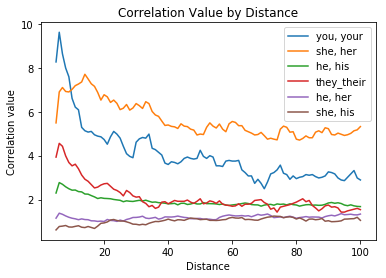

In [20]:
# Generate a linear curve where the x-axis represents the distance D
# and the y-axis represents the value of the correlation. A legend identifies each word pair on the graph.

distance = list(range(1, 101))

plt.title('Running mean')
plt.plot(distance, df_you_your_smooth, label='you, your')
plt.plot(distance, df_she_her_smooth, label='she, her')
plt.plot(distance, df_he_his_smooth, label='he, his')
plt.plot(distance, df_they_their_smooth, label='they_their')
plt.plot(distance, df_he_her_smooth, label='he, her')
plt.plot(distance, df_she_his_smooth, label='she, his')
plt.title("Correlation Value by Distance")
plt.xlabel('Distance')
plt.ylabel('Correlation value')
plt.legend()
plt.show()     